# California Housing Price Prediction
Using regression models to predict median house prices based on census data


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df["MedHouseValue"] = housing.target

In [7]:
print(df.head())
print(df.info())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null 

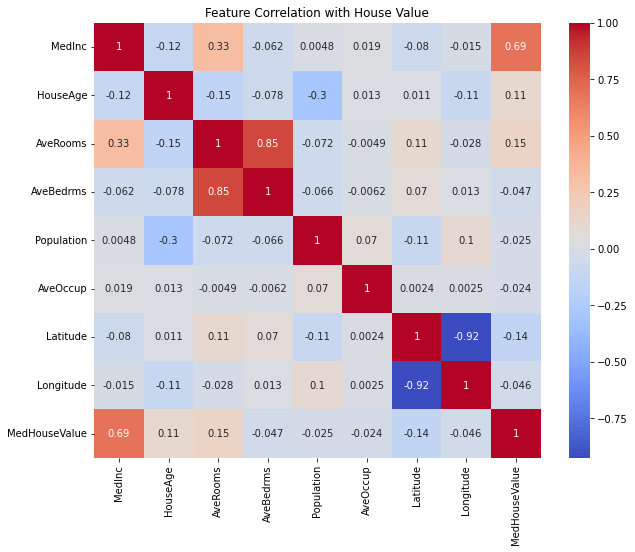

In [8]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title("Feature Correlation with House Value")
plt.show()

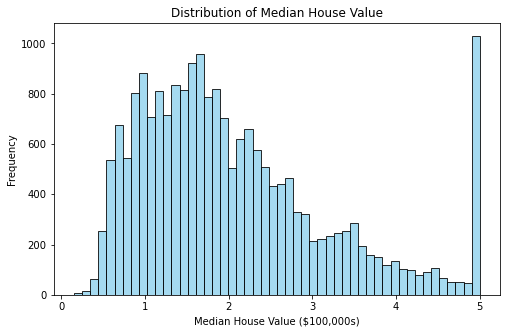

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df["MedHouseValue"], bins=50, color="skyblue")
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.show()

# California Housing Price Prediction
Using California census data to build a regression model that predicts median house value.


## Project Objective
The goal is to predict median house values using features such as income, room count, and location data. We'll explore the data, visualize key relationships, and eventually train a regression model.


## Dataset Info
This dataset comes from `sklearn.datasets.fetch_california_housing()`. It contains 20,640 observations and 8 numerical features, all related to housing demographics in California.


## Initial Data Inspection
We use `.head()`, `.info()`, and `.describe()` to understand:
- Data types
- Value ranges
- Missing values (none in this dataset)


## Feature Correlation
A heatmap shows how strongly each feature is related to the target. We find that `MedInc` and `AveRooms` are most positively correlated with price.


## Target Variable Distribution
We visualize the distribution of `MedHouseValue` using a histogram to check for skewness and value capping.


## EDA Summary
- Median income is a strong indicator of housing price.
- There's a visible cap on house value at $500,000.
- The dataset is clean and ready for modeling.


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop("MedHouseValue", axis = 1)
y = df["MedHouseValue"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R² Score: {r2:.3f}")


RMSE: 0.746
MAE: 0.533
R² Score: 0.576


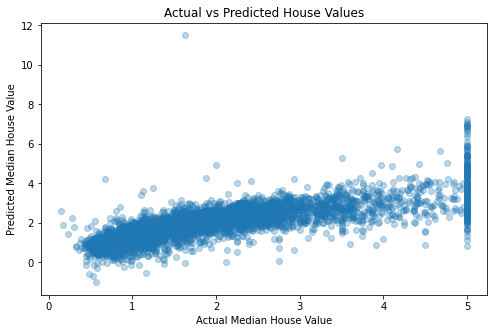

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.show()


### Scatter Plot Interpretation

- The model captures the overall trend: as actual house prices increase, so do predictions.
- However, predictions flatten out around the capped maximum house value ($500,000), causing underestimation at the high end.
- There are some extreme underpredictions, including negative values, which aren't realistic for house prices.
- This suggests that while linear regression gives a decent baseline, it may benefit from:
  - Feature normalization
  - Model regularization (e.g. Ridge, Lasso)
  - A non-linear model like Random Forest for better upper-range predictions


In [16]:
from sklearn.linear_model import Ridge


In [31]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R² Score:", r2_score(y_test, y_pred_ridge))

Ridge RMSE: 0.74552227799927
Ridge R² Score: 0.5758549611440128


In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso R² Score:", r2_score(y_test, y_pred_lasso))


Lasso RMSE: 0.7832697618354822
Lasso R² Score: 0.5318167610318159


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 0.5053399773665033
Random Forest R² Score: 0.8051230593157366


### Model Comparison

| Model              | RMSE   | R² Score |
|--------------------|--------|----------|
| Linear Regression  | 0.746  | 0.576    |
| Ridge Regression   | 0.746  | 0.576    |
| Lasso Regression   | 0.783  | 0.532    |
| Random Forest      | 0.505  | 0.805    |




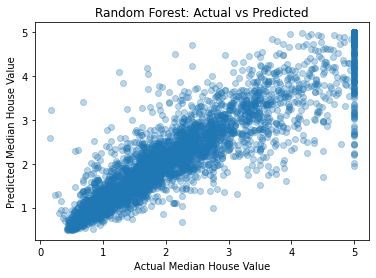

In [32]:
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


### Model Evaluation Summary

- **Ridge and Lasso** slightly improved performance by controlling overfitting, but are still linear models.
- **Random Forest** significantly reduced error and increased R² — showing it's better at capturing complex patterns in housing data.
- This suggests that real-world house prices are influenced by non-linear relationships between features.
